Для зміни Runtime Type потрібно клікнути *Runtime -> Change runtime type -> обрати CPU або GPU в полі Hardware accelerator -> Save*

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, models, layers, losses
import matplotlib.pyplot as plt
tf.test.is_gpu_available()

: 

: 

11490434/11490434 [==============================] - 2s 0us/step
Before transforms:  (60000, 28, 28) (10000, 28, 28)
After:  (60000, 28, 28, 1) (10000, 28, 28, 1)


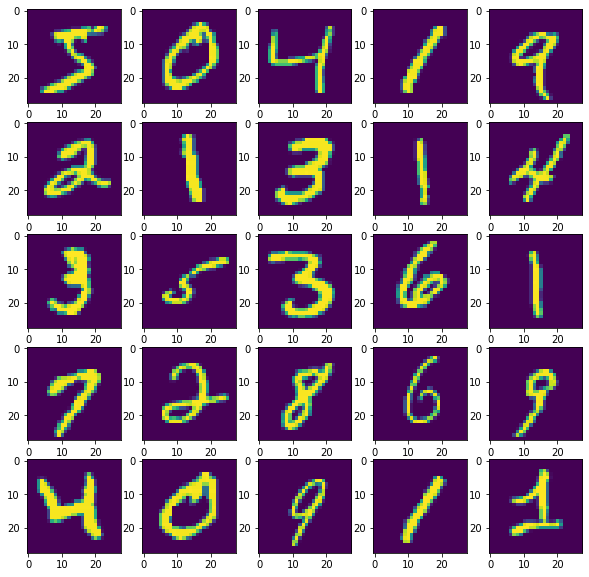

In [ ]:
# Load MNIST dataset
(train, train_labels), (test, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to range between 0 and 1
train, test = train.astype("float32") / 255.0, test.astype("float32") / 255.0

print("Before transforms: ", train.shape, test.shape)

train = np.expand_dims(train, -1) # to shape = (batch, h, w, c)
test = np.expand_dims(test, -1)

print("After: ", train.shape, test.shape)

train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)


# Show images
plt.figure(figsize=(10, 10)) # grid size

for i in range(25):
    plt.subplot(5, 5, i+1)    # n. of images in the grid is 25
    plt.imshow(train[i, :, :, 0])

plt.show()

In [ ]:
#@title Hyperparams
batch_size = 512 #@param {type:"integer"}
kernel_size = 3 #@param {type:"integer"}
n_epochs=3 #@param {type:"integer"}
optimizer="adam" #@param {type: "string"}

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(28, 28, 1)))
model.add(layers.Conv2D(16, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, kernel_size, activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10)) # because there are 10 digits, thus 10 output classes

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

Epoch 1/3
118/118 [==============================] - 12s 14ms/step - loss: 0.7776 - accuracy: 0.7723 - val_loss: 0.2042 - val_accuracy: 0.9409
Epoch 2/3
118/118 [==============================] - 1s 7ms/step - loss: 0.1605 - accuracy: 0.9535 - val_loss: 0.1093 - val_accuracy: 0.9685
Epoch 3/3
118/118 [==============================] - 1s 6ms/step - loss: 0.1056 - accuracy: 0.9691 - val_loss: 0.0832 - val_accuracy: 0.9748
313/313 - 1s - loss: 0.0832 - accuracy: 0.9748 - 1s/epoch - 4ms/step
Test loss:  0.08317586034536362
Test accuracy:  0.9747999906539917


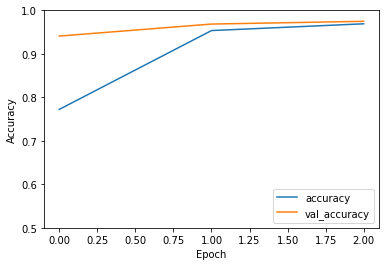

In [ ]:
# Compilation
model.compile(optimizer, loss=losses.CategoricalCrossentropy(from_logits=True), metrics=["accuracy"])
# Training
report = model.fit(train, train_labels, epochs=n_epochs, batch_size=batch_size, validation_data=(test, test_labels))

plt.plot(report.history['accuracy'], label='accuracy')
plt.plot(report.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test, test_labels, verbose=2)

print("Test loss: ", test_loss)
print("Test accuracy: ", test_acc)